<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-19 06:38:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  38.4MB/s    in 5.0s    

2025-04-19 06:38:10 (40.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [17]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [18]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [19]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [20]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


array([[<Axes: title={'center': 'CompTotal'}>]], dtype=object)

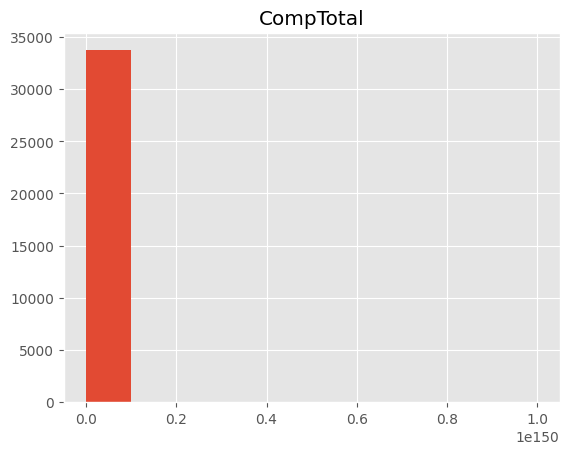

In [21]:
# your code goes here
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.hist(column='CompTotal')

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


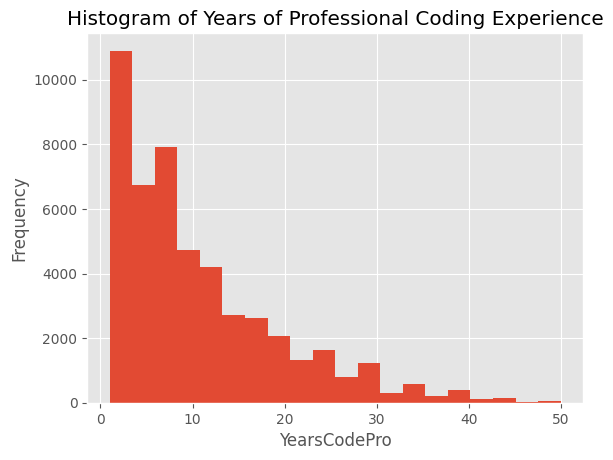

In [23]:


# SQL query to fetch data
QUERY = """
SELECT * FROM main
"""

# Executing the query and reading data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Check the data types of each column
print(df.dtypes)

# Convert 'YearsCodePro' to numeric if it's not already
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Plotting the histogram for the 'YearsCodePro' column
df.hist(column='YearsCodePro', bins=20)
plt.title('Histogram of Years of Professional Coding Experience')
plt.xlabel('YearsCodePro')
plt.ylabel('Frequency')
plt.show()



### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


/tmp/ipykernel_3776/1005623898.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['CompTotal'].plot(kind='hist', alpha=0.5, bins=20, legend=True)


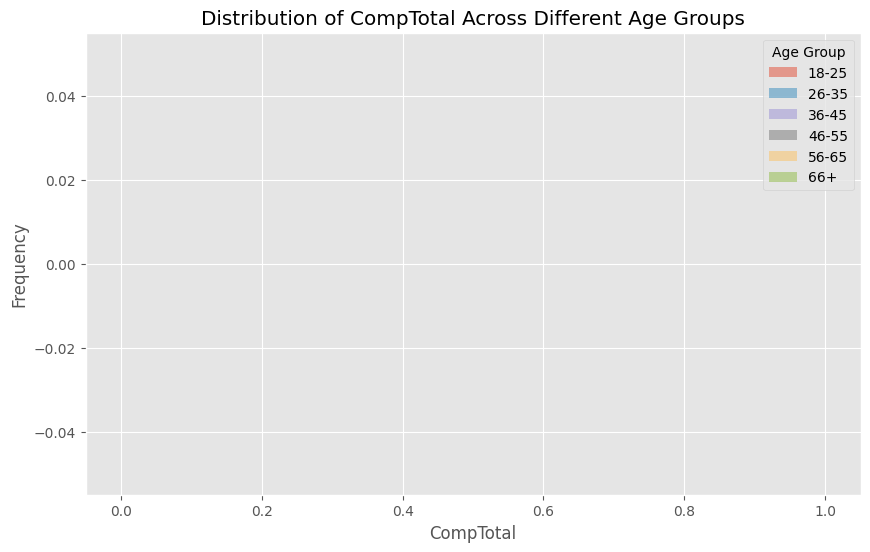

In [24]:

# SQL query to fetch data
QUERY = """
SELECT * FROM main
"""

# Executing the query and reading data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Check the data types of each column (just for safety check)
print(df.dtypes)

# Convert 'Age' and 'CompTotal' to numeric if necessary
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows where 'Age' or 'CompTotal' is NaN (optional, depends on how you want to handle missing data)
df = df.dropna(subset=['Age', 'CompTotal'])

# Create age bins (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65, 100]  # Adjust as per your preference
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plotting histograms for each age group
plt.figure(figsize=(10, 6))

# Create a histogram for each age group
df.groupby('AgeGroup')['CompTotal'].plot(kind='hist', alpha=0.5, bins=20, legend=True)

# Customizing the plot
plt.title('Distribution of CompTotal Across Different Age Groups')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.show()



**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


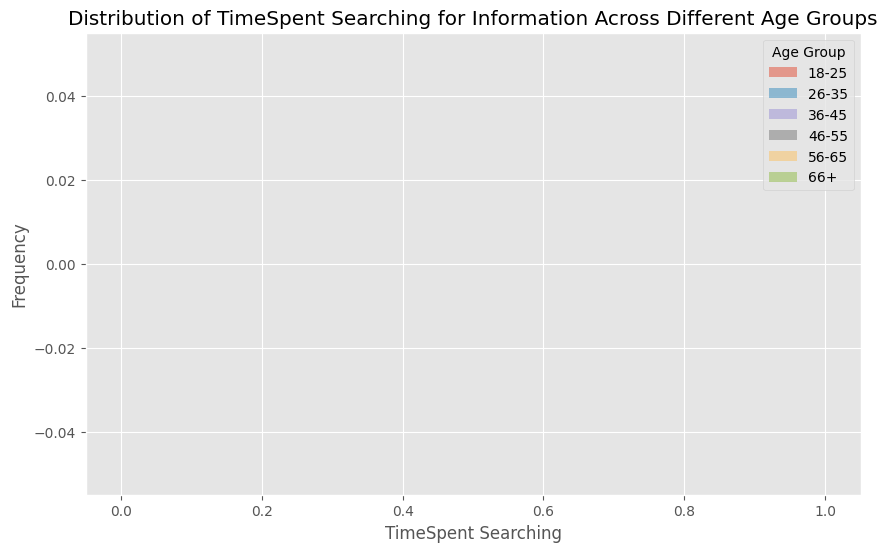

In [26]:


# SQL query to fetch data
QUERY = """
SELECT * FROM main
"""

# Executing the query and reading data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Check the data types of each column (just for safety check)
print(df.dtypes)

# Convert 'Age' and 'TimeSearching' to numeric if necessary
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')

# Drop rows where 'Age' or 'TimeSearching' is NaN (optional, depends on how you want to handle missing data)
df = df.dropna(subset=['Age', 'TimeSearching'])

# Create age bins (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65, 100]  # Adjust as per your preference
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plotting histograms for each age group
plt.figure(figsize=(10, 6))

# Create a histogram for each age group for 'TimeSearching'
df.groupby('AgeGroup', observed=False)['TimeSearching'].plot(kind='hist', alpha=0.5, bins=20, legend=True)

# Customizing the plot
plt.title('Distribution of TimeSpent Searching for Information Across Different Age Groups')
plt.xlabel('TimeSpent Searching')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.show()




### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


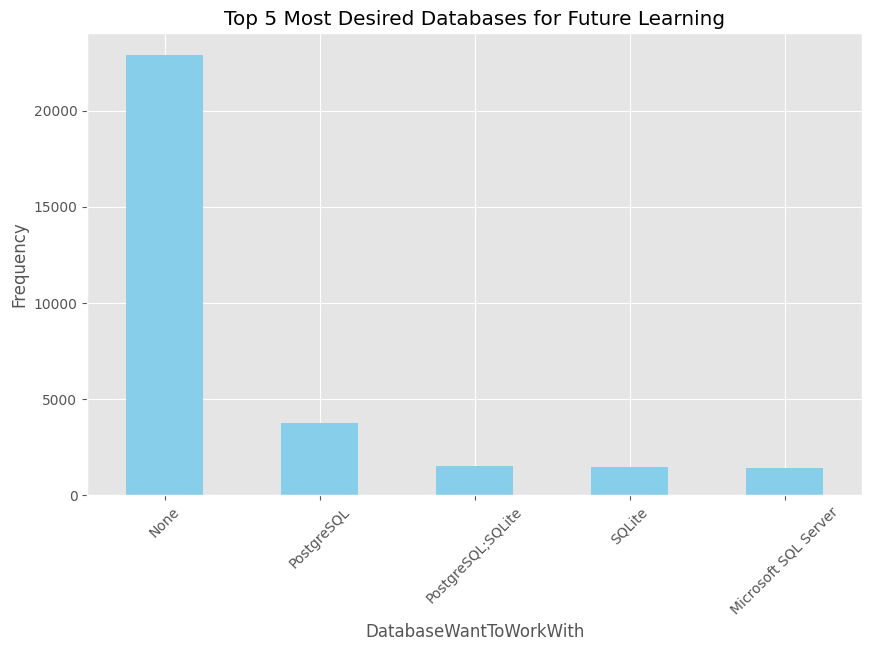

In [29]:


# SQL query to fetch data
QUERY = """
SELECT * FROM main
"""

# Executing the query and reading data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Check the columns in your DataFrame to ensure the correct column is selected
print(df.columns)

# Assuming the correct column is 'Databases' (update if necessary)
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].astype(str)

# Split any database entries that might be comma-separated or in some other delimiter format
databases = df['DatabaseWantToWorkWith'].str.split(',').explode().str.strip()

# Count the occurrences of each database
database_counts = databases.value_counts()

# Select the top 5 most desired databases
top_5_databases = database_counts.head(5)

# Plotting the histogram (bar plot)
plt.figure(figsize=(10, 6))
top_5_databases.plot(kind='bar', color='skyblue')

# Customizing the plot
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('DatabaseWantToWorkWith')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
[nan]


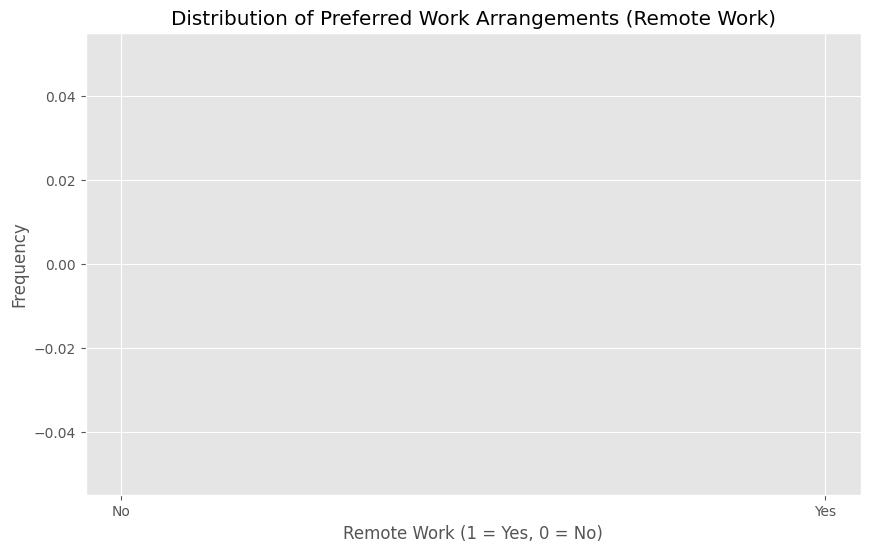

In [30]:


# SQL query to fetch data
QUERY = """
SELECT * FROM main
"""

# Executing the query and reading data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Check the column names to ensure we have the correct column
print(df.columns)


df['RemoteWork'] = df['RemoteWork'].map({'Yes': 1, 'No': 0})

# Check the unique values in 'RemoteWork' to confirm the mapping
print(df['RemoteWork'].unique())

# Plotting the histogram for 'RemoteWork'
plt.figure(figsize=(10, 6))
df['RemoteWork'].plot(kind='hist', bins=2, alpha=0.7, color='skyblue')

# Customizing the plot
plt.title('Distribution of Preferred Work Arrangements (Remote Work)')
plt.xlabel('Remote Work (1 = Yes, 0 = No)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()




### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [ ]:
## Write your code here

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [ ]:
## Write your code here

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [15]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
